Vamos a analizar el comportamiento de un automovil como un sistema Masa Resorte Amortiguador, analizando lo que pasa en un viaje con muchos baches, y con la masa de un sedan  promedio con una persona adentro.

En un sistema Masa Resorte Amortiguador se tiene un comportamiento descrito basicamente por las leyes de Newton.

Si tenemos un bloque colgado por medio de un resorte y un amortiguador a un soporte fijo, tenemos que existe una fuerza $\vec{F}$ en el sentido de la atracción gravitacional, y una fuerza debido al resorte $\vec{F}_k$ en el sentido contrario, de magnitud $k x$, donde $x$ es la distancia que ha sido elongado o comprimido tal resorte.

Tambien tenemos una aportación debido al amortiguador $\vec{F}_c$, de sentido contrario al movimiento de la masa y de magnitud $c \dot{x}$.

Por lo que todas estas contribuciones pueden ser sumadas para modelar el comportamiento del sistema en una Ecuacion Diferencial Ordinaria:

$$\vec{F} - \vec{F}_k - \vec{F}_c = m \ddot{x}$$

$$m g - k x - c \dot{x} = m \ddot{x}$$

Lo cual escrito de diferente manera es $m \ddot{x} + c \dot{x} + k x = m g$ o, si dividimos la expresión completa por $m$ tendremos $\ddot{x} + \frac{c}{m} \dot{x} + \frac{k}{m} x = g$.

Por lo que deducimos que la funcion de transferencia (la cual obtenemos sacando la transformada de Laplace) de este sistema será: $FT = \frac{g}{s^2 +\frac{c}{m} s + \frac{k}{m}}$

Aqui podemos hacer notar un par de cosas; la gravedad se puede considerar como una constante... a menos que se piense viajar a otro planeta o incluso a penas salir del mismo, lo cual considero improbable con tu vehiculo actual. De igual manera la masa de tu automovil es fija, a menos que se vaya desarmando mientras conduces, pero dejemos ese caso particular para un estudio posterior. Asi pues las variables que tenemos aqui son $c$ y $k$.

En primera instancia probemos con valores para $c = 1,500\frac{N s}{m}$ y $k = 15,000 \frac{N}{m}$ y comprobemos la respuesta al escalon unitario, de la misma manera definamos que la masa tendra un valor de $m = 1200 kg$. Para esto importamos la libreria python-control.

In [30]:
from control import tf, step, impulse, rlocus
from numpy import linspace
%matplotlib notebook
from matplotlib.pyplot import plot

Declaramos las variables y asignamos una función de transferencia a ellas. $G$ es nuestro sistema y $EU$ es la representación del escalon unitario, es decir, el comportamiento que estamos introduciendo a nuestro sistema. $w$ es la variable que guarda valores sobre los que nuestro sistema va a actuar.

In [20]:
G = tf([9.81], [1.0, 1500.0/1200.0, 15000.0/1200.0])
EU = tf([1,0], [1,0])
w = linspace(0, 10, 1000)

Entonces, llamamos a la función impulse que nos va a devolver un conjunto de puntos, de como el sistema se comporta, y los dibujamos en la grafica. Graficamos tanto a $G$ como a $EU$ para poder comparar el comportamiento del sistema.

<IPython.core.display.Javascript object>


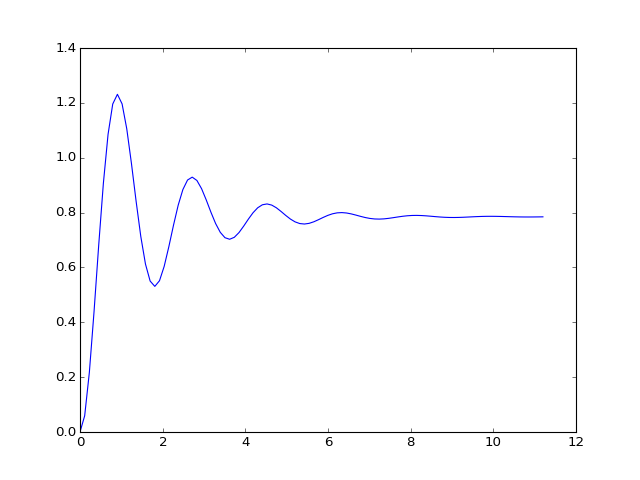

In [13]:
y, t = step(G)
plot(t, y)
#y,t = step(EU, w)
#plot(t, y)
#xlim([0,10]);

<IPython.core.display.Javascript object>


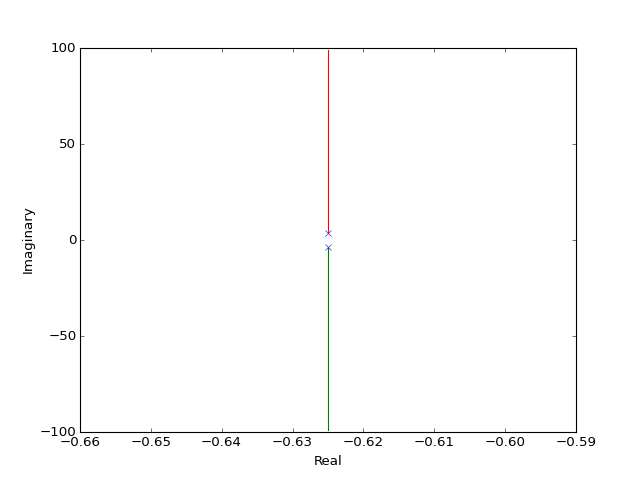

In [23]:
r, k = rlocus(G)

Aqui podemos observar como al introducir al sistema un escalon unitario, el amortiguador empieza a oscilar y poco a poco tiene hacia un valor fijo de $\approx 0.8$. Esto seria equivalente a que en un banco de pruebas, sometemos al amortiguador a una fuerza subitamente, el amortiguador oscilaria un poco, hasta llegar a un valor fijo. De alguna manera, este es el comportamiento deseado, imagina que pasaria si la parte que amortigua el movimiento fuera muy debil (es decir, el aceite dentro del amortiguador no tuviera la viscosidad necesaria), se veria un poco asi:

Cambiamos el valor de $c = 500 \frac{N s}{m}$.

In [24]:
G = tf([9.81],[1.0, 500.0/1200.0, 15000.0/1200.0])
EU = tf([1,0],[1,0])

Y volvemos a dibujar el comportamiento del sistema.

<IPython.core.display.Javascript object>


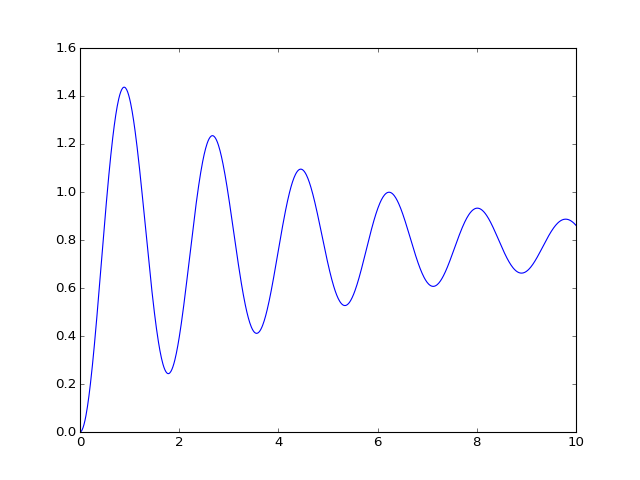

In [19]:
y,t = step(G,w)
plot(t,y)
#y,t = step(EU,w)
#plot(t,y)
#xlim([0,10]);

<IPython.core.display.Javascript object>


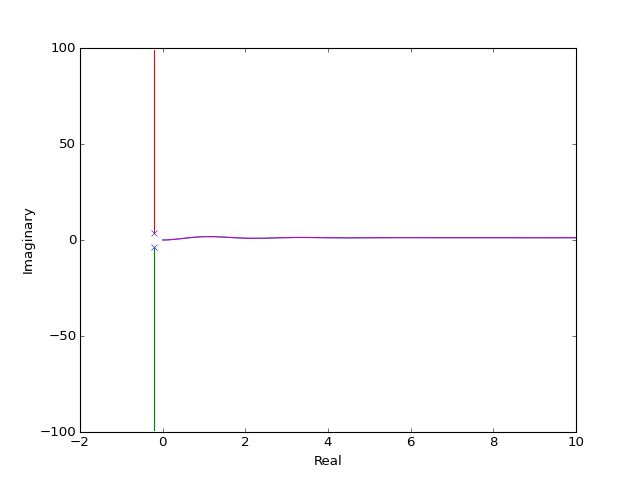

In [25]:
r, k = rlocus(G)

Aqui podemos ver claramente como el comportamiento del sistema se vuelve mas inestable, es decir, oscila de manera mas pronunciada y por mayor tiempo. En la grafica anterior el sobrepaso maximo (el valor maximo obtenido despues de sobrepasar el valor al que tendera el sistema) era de $\approx 0.2$ y en esta grafica es de $\approx 0.45$.

Tambien podemos ver una diferencia en el tiempo de establecimiento (el tiempo que le toma a las oscilaciones desaparecer), en la grafica pasada era de $\approx 8 s$ y en esta es de $> 10 s$.

Asi, podemos ver el efecto que tiene el amortiguador en este sistema, sin embargo tambien el resorte tiene un efecto, que pasaria si el resorte tuviera una constante $k$ menor:

Cambiamos el valor de $k = 10,000 \frac{N}{m}$.

In [28]:
G = tf([9.81],[1.0, 1500.0/1200.0, 10000.0/1200.0])
EU = tf([1,0],[1,0])

Y volvemos a graficar el sistema.

<IPython.core.display.Javascript object>


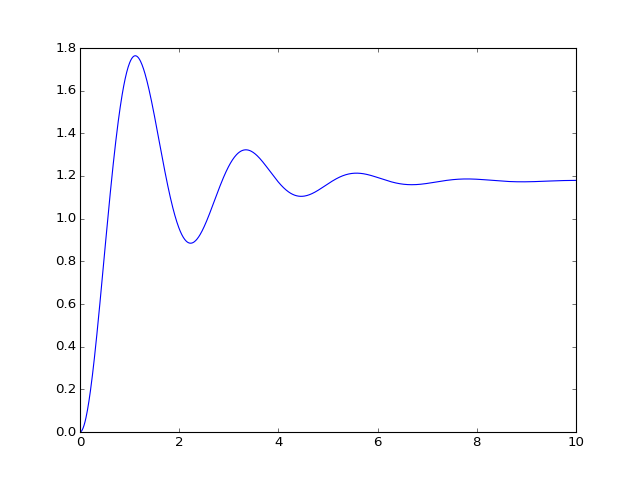

In [31]:
y,t = step(G,w)
plot(t,y)
#y,t = step(EU,w)
#plot(t,y)
#xlim([0,10]);

<IPython.core.display.Javascript object>


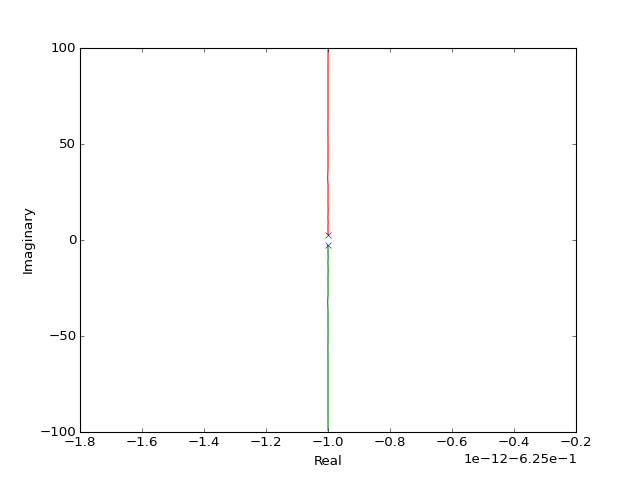

In [32]:
r, k = rlocus(G)

Aqui podemos notar que el tiempo de establecimiento es practicamente el mismo que en el original, pero que el sobrepaso maximo es de $\approx 0.6$, lo cual no es muy agradable si vas viajando en el coche a una gran velocidad... Pues bien, estas graficas son las mas comunes dentro del control para determinar el comportamiento de un sistema, sin embargo hay otro tipo de grafica que nos podria ayudar a entender mejor debido a la naturaleza del sistema.

La respuesta al impulso unitario nos daria la respuesta de nuestro sistema a perturbaciones muy rapidas, como por ejemplo un bache en el camino. Esto se veria asi:

Regresamos a nuestro sistema original.

In [57]:
G = tf([9.81],[1.0, 1500.0/1200.0, 15000.0/1200.0])
EU = tf([1,0],[1,0])

Y graficamos la respuesta al impulso unitario.

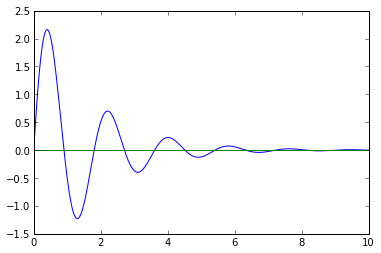

In [58]:
y,t = impulse(G,w)
plot(t,y)
y,t = impulse(EU,w)
plot(t,y)
xlim([0,10]);

Aqui podemos ver como el sistema tiene un pico repentino al principio (correspondiente al bache en el camino y como cambia la longitud del amortiguador para evitar que la cabina se mueva demasiado) y oscila un poco hasta llegar a su estado original. Si de nuevo cambiamos el amortiguador en el sistema para tener un menor efecto tendremos:

In [59]:
G = tf([9.81],[1.0, 500.0/1200.0, 15000.0/1200.0])
EU = tf([1,0],[1,0])

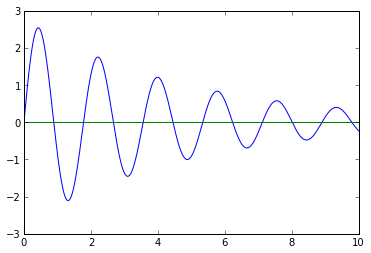

In [60]:
y,t = impulse(G,w)
plot(t,y)
y,t = impulse(EU,w)
plot(t,y)
xlim([0,10]);

Aqui podemos ver como el amortiguador sigue oscilando despues de los $10 s$. Si por el contrario cambiamos la constante del resorte tendremos:

In [61]:
G = tf([9.81],[1.0, 1500.0/1200.0, 10000.0/1200.0])
EU = tf([1,0],[1,0])

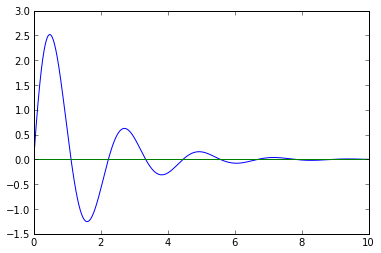

In [62]:
y,t = impulse(G,w)
plot(t,y)
y,t = impulse(EU,w)
plot(t,y)
xlim([0,10]);

De esta manera el sistema oscila menos, pero el pico inicial es mucho mayor, y por lo general este tipo de comportamientos tampoco es bueno debido a que pueden crear descomposturas en tu vehiculo.